### Uniform Classes Bert Classifier

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import sklearn

from keras.models import Sequential
from keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from keras.layers import Dense, Embedding, LSTM,Dropout, Conv1D, MaxPooling1D, Dropout, Activation
import tensorflow as tf

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter 
import wordcloud
from nltk.corpus import stopwords 
from textblob import Word 
import re
from string import punctuation
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv('t.csv')

#### All Classes Maslow

##### Cleaning the Data

In [ ]:
df1 = df.drop(columns = ['action','motivation'])

In [ ]:
def clean(string):
    res = string.strip('][').split(', ')
    lis = []
    for word in res:
        q = word.strip('][').split(', ')
        w = q[0].lstrip('\"')[:-1]
        if w == '' or w == 'na':
            lis.append('none')
        else:
            lis.append(w)
    string = lis
    for classes in lis:
        if classes not in uniqueClasses:
            uniqueClasses.append(classes)
    return string

In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['maslow'][i] = clean(df1['maslow'][i]);
uniqueClassesMaslow = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['reiss'][i] = clean(df1['reiss'][i]);
uniqueClassesReiss = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2 = df1
df3 = df2.explode('maslow')

In [ ]:
df2.head(60)

,storyid,linenum,char,motiveworkerid,context,sentence,maslow,reiss
0,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann0,NaN,I began making fish curry for my boyfriend and I.,[physiological],[food]
1,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann1,NaN,I began making fish curry for my boyfriend and I.,"[love, physiological]","[family, romance, food]"
2,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,I (myself),ann2,NaN,I began making fish curry for my boyfriend and I.,[physiological],[food]
3,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,1,Boyfriend,none,NaN,I began making fish curry for my boyfriend and I.,[none],[none]
4,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann0,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,[spiritual growth],[indep]
5,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann1,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,[physiological],[food]
6,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,I (myself),ann2,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,[spiritual growth],[indep]
7,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,2,Boyfriend,none,I began making fish curry for my boyfriend and I.,I decided not to read a recipe since I've made...,[none],[none]
8,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann0,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,"[esteem, love]","[competition, approval, romance]"
9,a2ddbb50-e45b-4ad3-becf-b2d8475172bf,3,I (myself),ann1,I began making fish curry for my boyfriend and...,I let the curry sit before tasting.,"[spiritual growth, esteem]","[indep, competition]"


In [ ]:
df3 = df3[df3['motiveworkerid'] != 'none']
df3 = df3[['motiveworkerid','sentence','maslow','reiss']]


In [ ]:
df3 = df3.drop_duplicates(subset = ['sentence']).reset_index(drop = True)

In [ ]:
df3.head(10)

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]
1,ann0,I decided not to read a recipe since I've made...,spiritual growth,[indep]
2,ann0,I let the curry sit before tasting.,esteem,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",spiritual growth,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]
5,ann0,He wants to have a girlfriend.,love,[romance]
6,ann0,One day he meets a nice girl at the grocery st...,love,"[contact, romance]"
7,ann0,They begin to date.,love,"[contact, romance]"
8,ann0,Jervis is happy that he is no longer single.,love,[romance]
9,ann0,Ray couldn't get an irritating tune out of his...,none,[none]


In [ ]:
'''
from sklearn.utils import shuffle
k1 = df3[df3['maslow'] == 'none'] 
k2 = df3[df3['maslow'] == 'physiological']
df3 = pd.concat([k1,k2],axis = 0)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
'''

"\nfrom sklearn.utils import shuffle\nk1 = df3[df3['maslow'] == 'none'] \nk2 = df3[df3['maslow'] == 'physiological']\ndf3 = pd.concat([k1,k2],axis = 0)\ndf3 = shuffle(df3)\ndf3 = df3.reset_index()\ndf3 = df3.drop(columns = 'index')\n"

##### Cleaning the Data for NLP tasks

In [ ]:
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]
1,ann0,I decided not to read a recipe since I've made...,spiritual growth,[indep]
2,ann0,I let the curry sit before tasting.,esteem,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",spiritual growth,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]


In [ ]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')
df3.to_csv('file1.csv')

In [ ]:
df3.shape

(10670, 4)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

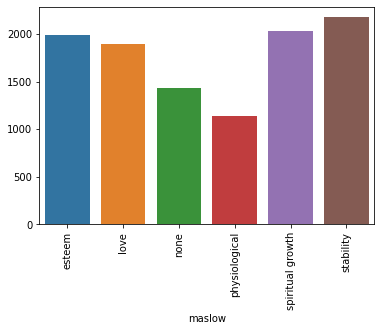

In [ ]:
c = df3.groupby('maslow')['maslow'].count()
sns.barplot(x = c.index, y = c.values)
plt.xticks(rotation = 90)

In [ ]:
df3.shape[0]

10670

In [ ]:
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
esteem,1990
love,1896
none,1436
physiological,1139
spiritual growth,2035
stability,2174


In [ ]:
undersampling_count = df3[['sentence','maslow']].groupby('maslow').count().min()[0]
print(undersampling_count)
print(list(df3['maslow'].unique()))

1139
['physiological', 'spiritual growth', 'esteem', 'none', 'love', 'stability']


In [ ]:
# UNDERSAMPLING

dontSeeIndex = 5
from sklearn.utils import shuffle
lis = list(df3['maslow'].unique())
print(type(lis))
print(lis)
dataframes = []
for i in range(len(lis)):
    dataframe = 't' + str(i)
    dataframe = df3[df3['maslow'] == lis[i]]
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(columns = 'index')
    if i!=dontSeeIndex:
        dataframe = shuffle(dataframe)
        dataframe = dataframe.iloc[:1139][:]
    dataframes.append(dataframe)
dataframes[0].head(1)
dataframes[5].head(1)

<class 'list'>
['physiological', 'spiritual growth', 'esteem', 'none', 'love', 'stability']


,motiveworkerid,sentence,maslow,reiss
0,ann0,She was trying to come up with extra money.,stability,[savings]


In [ ]:
df3 = pd.concat(dataframes)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
esteem,1139
love,1139
none,1139
physiological,1139
spiritual growth,1139
stability,2174


In [ ]:
lb = LabelEncoder() 
df3['maslowLabel'] = lb.fit_transform(df3['maslow'])

In [ ]:
print(df3['maslow'].unique())
print(df3['maslowLabel'].unique())

['physiological' 'stability' 'spiritual growth' 'love' 'esteem' 'none']
[3 5 4 1 0 2]


In [ ]:
uniqueClassesMaslow = list(df3['maslow'].unique())
uniqueClassesMaslowLabel = list(df3['maslowLabel'].unique())
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[3, 5, 4, 1, 0, 2]
['physiological', 'stability', 'spiritual growth', 'love', 'esteem', 'none']


In [ ]:
df4 = df3.copy()

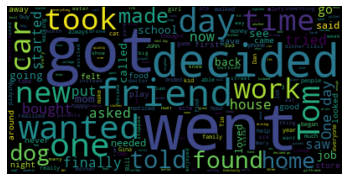

In [ ]:
common_words = ''
for i in df4.sentence:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(common_words)   
plt.imshow(wordcloud, interpolation = 'bilinear')  # bilinear is used to display smooth images
plt.axis('off')
plt.show()

In [ ]:
k = pd.Series(np.concatenate([x.split() for x in df4.sentence])).value_counts()
a = df4['sentence'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
print(len(word_dist))
rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 6628 samples and 79634 outcomes>
6628
       Word  Frequency
0         .       7605
1       the       3326
2        to       2962
3         a       2329
4        he       1920
5       was       1791
6       she       1635
7       and       1546
8       her       1217
9         ,       1104
10      his       1103
11        i        960
12       it        894
13       in        807
14       of        735
15      for        713
16      had        704
17       on        604
18     they        489
19       at        443
20       up        419
21     that        416
22     with        413
23       my        384
24     went        368
25      out        368
26      him        363
27      n't        352
28     when        341
29  decided        338


In [ ]:
print(df4.sentence.map(lambda x: len(x)).max())

71


In [ ]:
lengths = df4["sentence"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df4.iloc[argmax].head(1)

,motiveworkerid,sentence,maslow,reiss,maslowLabel
26,ann0,My friend talked me into playing it even thoug...,esteem,[competition],0


##### Model BERT

https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 1.8 MB 3.7 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 238 kB 35.7 MB/s 
     |████████████████████████████████| 116 kB 48.5 MB/s 
     |████████████████████████████████| 1.2 MB 45.5 MB/s 
     |████████████████████████████████| 99 kB 7.0 MB/s 
     |████████████████████████████████| 48.3 MB 132 kB/s 
     |████████████████████████████████| 596 kB 41.9 MB/s 
     |████████████████████████████████| 352 kB 49.3 MB/s 
     |████████████████████████████████| 1.1 MB 48.3 MB/s 


In [ ]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

KeyboardInterrupt: ignored

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(6, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalCrossentropy(name='categorical_cross_entropy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df4['sentence'],df4['maslowLabel'],test_size = 0.2, random_state = 0, stratify = df4['maslowLabel'])

In [ ]:
x_train_text = x_train 
x_test_text = x_test
y_train_text = y_train
y_test_text = y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = model.fit(x_train, y_train,epochs=50, verbose=1, validation_data = (x_test,y_test),callbacks=[model_checkpoint_callback, callback])
#history = model.fit(x_train, y_train,epochs=10,verbose=1,validation_data = (x_test,y_test))   

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(x_test, y_test)

In [ ]:
print(history.history.keys())

In [ ]:
plt.plot(history.history['loss'], '-o', label='Train Loss')
plt.plot(history.history['val_loss'], '-o', label = 'Val Loss')
plt.legend()

In [ ]:
plt.plot(history.history['accuracy'], '-o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'Val Accuracy')
plt.legend()

##### Evaluation and Analysis

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[2]

In [ ]:
review_predictions = []
for prediction in y_pred:
    x = prediction
    review_predictions.append(np.argmax(x))

review_predictions = np.array(review_predictions)
review_predictions.reshape(1,-1)
review_predictions.shape

In [ ]:
review_predictions

In [ ]:
k = pd.DataFrame(review_predictions, columns = ['Label'])
k.groupby('Label')['Label'].count()

In [ ]:
type(y_test_text)

In [ ]:
r1 = sklearn.metrics.confusion_matrix(review_predictions, y_test_text)
print(r1)

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.heatmap(r1, annot=True, cmap = 'Blues')

In [ ]:
lb.classes_

In [ ]:
y_test_text

In [ ]:
text_label = pd.Series(lb.inverse_transform(y_test_text))
integer_label = pd.Series(y_test_text)

In [ ]:
integer_label = integer_label.reset_index(drop = True)
integer_label[0:20]

In [ ]:
text_label[0:20]

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

In [ ]:
make_confusion_matrix(r1, group_names=uniqueClassesMaslowLabel, categories=uniqueClassesMaslow, cmap='Blues')

In [ ]:
x_test_text = x_test_text.reset_index(drop = True)
x_test_text[0:5]

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

In [ ]:
y_test

In [ ]:
count = 0
for i in range(0,len(review_predictions)):
    if review_predictions[i] != 0 and integer_label[i] == 0 and count != 10:
        print(x_test_text[i])
        count = count + 1

#### One Vs All -> Physiological and ALL 

##### Cleaning the Data

In [ ]:
df1 = df.drop(columns = ['action','motivation'])

In [ ]:
def clean(string):
    res = string.strip('][').split(', ')
    lis = []
    for word in res:
        q = word.strip('][').split(', ')
        w = q[0].lstrip('\"')[:-1]
        if w == '' or w == 'na':
            lis.append('none')
        else:
            lis.append(w)
    string = lis
    for classes in lis:
        if classes not in uniqueClasses:
            uniqueClasses.append(classes)
    return string

In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['maslow'][i] = clean(df1['maslow'][i]);
uniqueClassesMaslow = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['reiss'][i] = clean(df1['reiss'][i]);
uniqueClassesReiss = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2 = df1
df3 = df2.explode('maslow')

In [ ]:
df3 = df3[df3['motiveworkerid'] != 'none']
df3 = df3[['motiveworkerid','sentence','maslow','reiss']]
df3 = df3.drop_duplicates(subset = ['sentence']).reset_index(drop = True)

In [ ]:
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]
1,ann0,I decided not to read a recipe since I've made...,spiritual growth,[indep]
2,ann0,I let the curry sit before tasting.,esteem,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",spiritual growth,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]


In [ ]:
df3.maslow.unique()

array(['physiological', 'spiritual growth', 'esteem', 'none', 'love',
       'stability'], dtype=object)

In [ ]:
df3 = df3.replace(to_replace = ["esteem","spiritual growth",'love','stability'], value = "none")
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]
1,ann0,I decided not to read a recipe since I've made...,none,[indep]
2,ann0,I let the curry sit before tasting.,none,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",none,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]


##### Cleaning the Data for NLP tasks

In [ ]:
df3.shape

(10670, 4)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

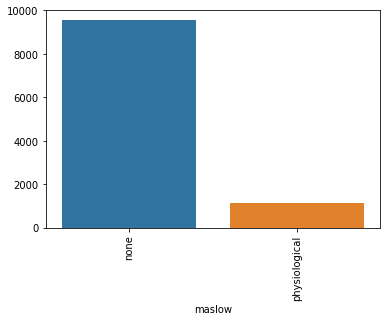

In [ ]:
c = df3.groupby('maslow')['maslow'].count()
sns.barplot(x = c.index, y = c.values)
plt.xticks(rotation = 90)

In [ ]:
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
none,9531
physiological,1139


In [ ]:
undersampling_count = df3[['sentence','maslow']].groupby('maslow').count().min()[0]
print(undersampling_count)
print(list(df3['maslow'].unique()))

1139
['physiological', 'none']


In [ ]:
# UNDERSAMPLING

dontSeeIndex = 0
from sklearn.utils import shuffle
lis = list(df3['maslow'].unique())
print(type(lis))
print(lis)
dataframes = []
for i in range(len(lis)):
    dataframe = 't' + str(i)
    dataframe = df3[df3['maslow'] == lis[i]]
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(columns = 'index')
    if i!=dontSeeIndex:
        dataframe = shuffle(dataframe)
        dataframe = dataframe.iloc[:1139][:]
    dataframes.append(dataframe)
dataframes[0].head(1)

<class 'list'>
['physiological', 'none']


,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]


In [ ]:
df3 = pd.concat(dataframes)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
none,1139
physiological,1139


In [ ]:
lb = LabelEncoder() 
df3['maslowLabel'] = lb.fit_transform(df3['maslow'])

In [ ]:
print(df3['maslow'].unique())
print(df3['maslowLabel'].unique())

['none' 'physiological']
[0 1]


In [ ]:
uniqueClassesMaslow = list(df3['maslow'].unique())
uniqueClassesMaslowLabel = list(df3['maslowLabel'].unique())
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'physiological']


In [ ]:
df4 = df3.copy()

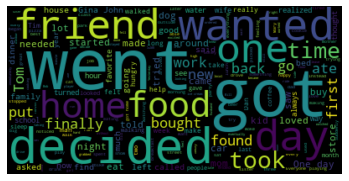

In [ ]:
common_words = ''
for i in df4.sentence:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(common_words)   
plt.imshow(wordcloud, interpolation = 'bilinear')  # bilinear is used to display smooth images
plt.axis('off')
plt.show()

In [ ]:
k = pd.Series(np.concatenate([x.split() for x in df4.sentence])).value_counts()
a = df4['sentence'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
print(len(word_dist))
rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 3324 samples and 22623 outcomes>
3324
       Word  Frequency
0         .       2209
1       the        957
2        to        840
3         a        640
4        he        557
5       was        532
6       she        489
7       and        429
8         ,        331
9       her        330
10      his        275
11       it        267
12        i        264
13       in        245
14       of        213
15      for        200
16      had        192
17       on        188
18     they        153
19       up        133
20       at        127
21      out        123
22     went        117
23     that        117
24  decided        113
25      got        111
26      day        107
27     when        102
28      one         99
29      n't         97


In [ ]:
print(df4.sentence.map(lambda x: len(x)).max())

71


In [ ]:
lengths = df4["sentence"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df4.iloc[argmax].head(1)

,motiveworkerid,sentence,maslow,reiss,maslowLabel
86,ann0,Jon's day went by slow but he's finally headin...,physiological,[none],1


##### Model BERT

https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

In [ ]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(2, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalCrossentropy(name='categorical_cross_entropy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df4['sentence'],df4['maslowLabel'],test_size = 0.2, random_state = 0, stratify = df4['maslowLabel'])

In [ ]:
x_train_text = x_train 
x_test_text = x_test
y_train_text = y_train
y_test_text = y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)

(1822,)
(456,)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(1822,)
(456,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
history = model.fit(x_train, y_train,epochs=10,verbose=1,validation_data = (x_test,y_test))   

Epoch 1/10
57/57 [==============================] - 34s 462ms/step - loss: 0.7339 - accuracy: 0.5143 - val_loss: 0.6883 - val_accuracy: 0.5307
Epoch 2/10
57/57 [==============================] - 25s 434ms/step - loss: 0.7038 - accuracy: 0.5401 - val_loss: 0.6844 - val_accuracy: 0.5285
Epoch 3/10
57/57 [==============================] - 24s 420ms/step - loss: 0.6885 - accuracy: 0.5554 - val_loss: 0.6655 - val_accuracy: 0.6009
Epoch 4/10
57/57 [==============================] - 24s 428ms/step - loss: 0.6826 - accuracy: 0.5670 - val_loss: 0.6501 - val_accuracy: 0.6338
Epoch 5/10
57/57 [==============================] - 25s 437ms/step - loss: 0.6771 - accuracy: 0.5895 - val_loss: 0.6580 - val_accuracy: 0.5965
Epoch 6/10
57/57 [==============================] - 25s 432ms/step - loss: 0.6852 - accuracy: 0.5823 - val_loss: 0.6396 - val_accuracy: 0.6447
Epoch 7/10
57/57 [==============================] - 24s 425ms/step - loss: 0.6616 - accuracy: 0.5950 - val_loss: 0.6400 - val_accuracy: 0.6404

In [ ]:
model.evaluate(x_test, y_test)

15/15 [==============================] - 5s 316ms/step - loss: 0.6158 - accuracy: 0.6886


[0.6158313155174255, 0.6885964870452881]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


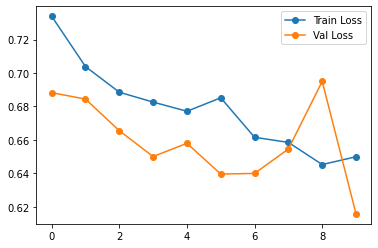

In [ ]:
plt.plot(history.history['loss'], '-o', label='Train Loss')
plt.plot(history.history['val_loss'], '-o', label = 'Val Loss')
plt.legend()

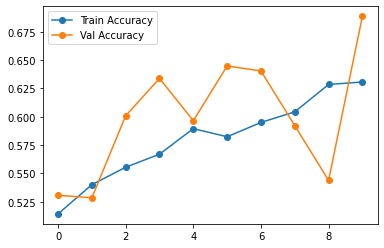

In [ ]:
plt.plot(history.history['accuracy'], '-o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'Val Accuracy')
plt.legend()

##### Evaluation and Analysis

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[2]

array([0.32647425, 0.67352575], dtype=float32)

In [ ]:
review_predictions = []
for prediction in y_pred:
    x = prediction
    review_predictions.append(np.argmax(x))

review_predictions = np.array(review_predictions)
review_predictions.reshape(1,-1)
review_predictions.shape

(456,)

In [ ]:
review_predictions

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [ ]:
k = pd.DataFrame(review_predictions, columns = ['Label'])
k.groupby('Label')['Label'].count()

Label
0    252
1    204
Name: Label, dtype: int64

In [ ]:
type(y_test_text)

pandas.core.series.Series

In [ ]:
r1 = sklearn.metrics.confusion_matrix(review_predictions, y_test_text)
print(r1)

[[169  83]
 [ 59 145]]


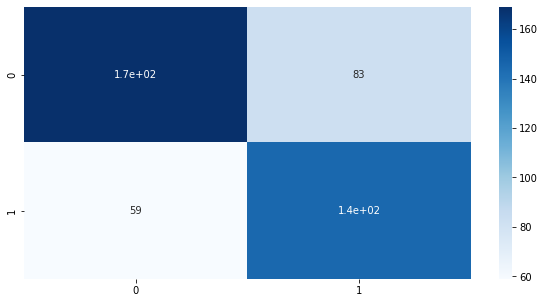

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.heatmap(r1, annot=True, cmap = 'Blues')

In [ ]:
lb.classes_

array(['none', 'physiological'], dtype=object)

In [ ]:
y_test_text

1472    0
1121    0
380     1
44      0
180     0
       ..
1667    0
1429    0
803     0
1649    0
1477    1
Name: maslowLabel, Length: 456, dtype: int64

In [ ]:
text_label = pd.Series(lb.inverse_transform(y_test_text))
integer_label = pd.Series(y_test_text)

In [ ]:
integer_label = integer_label.reset_index(drop = True)
integer_label[0:20]

0     0
1     0
2     1
3     0
4     0
5     1
6     1
7     1
8     0
9     0
10    1
11    1
12    1
13    0
14    0
15    1
16    1
17    0
18    0
19    0
Name: maslowLabel, dtype: int64

In [ ]:
text_label[0:20]

0              none
1              none
2     physiological
3              none
4              none
5     physiological
6     physiological
7     physiological
8              none
9              none
10    physiological
11    physiological
12    physiological
13             none
14             none
15    physiological
16    physiological
17             none
18             none
19             none
dtype: object

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'physiological']


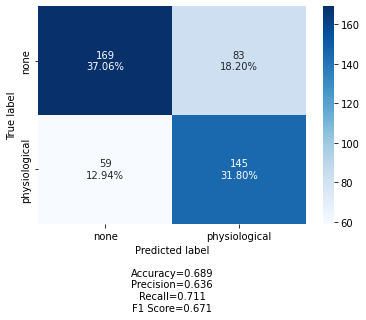

In [ ]:
make_confusion_matrix(r1, group_names=uniqueClassesMaslowLabel, categories=uniqueClassesMaslow, cmap='Blues')

In [ ]:
x_test_text = x_test_text.reset_index(drop = True)
x_test_text[0:5]

0                       Shawn is out shopping one day.
1    So Sam decided to quit playing tennis prematur...
2                       Sara then takes a cup to work.
3                   Jimmy couldn't wait to go fishing.
4    Jack was building a sand castle with turrets, ...
Name: sentence, dtype: object

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'physiological']


In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.

In [ ]:
count = 0
for i in range(0,len(review_predictions)):
    if review_predictions[i] != 0 and integer_label[i] == 0 and count != 10:
        print(x_test_text[i])
        count = count + 1

Jimmy couldn't wait to go fishing.
Wade's trash was still sitting in the garage.
Simon leaned down to pick up a compact disk from the floor.
Sam was angry that Beth forgot to buy him beer.
Agnes rescheduled her appointment for the following day.
It took us three days to climb the mountain.
Tom saw previews for a movie.
I needed to start my homework.
He decided to go for a run to tire himself out.
It was the best cake she ever tasted.


#### One Vs All -> Stability and ALL

##### Cleaning the Data

In [ ]:
df1 = df.drop(columns = ['action','motivation'])

In [ ]:
def clean(string):
    res = string.strip('][').split(', ')
    lis = []
    for word in res:
        q = word.strip('][').split(', ')
        w = q[0].lstrip('\"')[:-1]
        if w == '' or w == 'na':
            lis.append('none')
        else:
            lis.append(w)
    string = lis
    for classes in lis:
        if classes not in uniqueClasses:
            uniqueClasses.append(classes)
    return string

In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['maslow'][i] = clean(df1['maslow'][i]);
uniqueClassesMaslow = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['reiss'][i] = clean(df1['reiss'][i]);
uniqueClassesReiss = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2 = df1
df3 = df2.explode('maslow')

In [ ]:
df3 = df3[df3['motiveworkerid'] != 'none']
df3 = df3[['motiveworkerid','sentence','maslow','reiss']]
df3 = df3.drop_duplicates(subset = ['sentence']).reset_index(drop = True)

In [ ]:
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,physiological,[food]
1,ann0,I decided not to read a recipe since I've made...,spiritual growth,[indep]
2,ann0,I let the curry sit before tasting.,esteem,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",spiritual growth,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]


In [ ]:
df3.maslow.unique()

array(['physiological', 'spiritual growth', 'esteem', 'none', 'love',
       'stability'], dtype=object)

In [ ]:
df3 = df3.replace(to_replace = ["esteem","spiritual growth",'love','physiological'], value = "none")
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,none,[food]
1,ann0,I decided not to read a recipe since I've made...,none,[indep]
2,ann0,I let the curry sit before tasting.,none,"[competition, approval, romance]"
3,ann0,"When it was time to taste, I was disgusted.",none,[none]
4,ann0,I accidentally used a whole garlic instead of ...,none,[none]


##### Cleaning the Data for NLP tasks

In [ ]:
df3.shape

(10670, 4)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

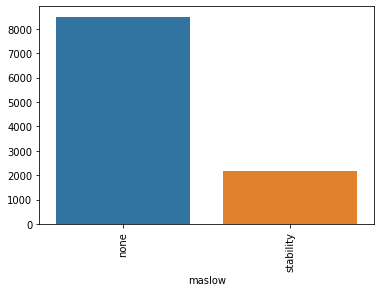

In [ ]:
c = df3.groupby('maslow')['maslow'].count()
sns.barplot(x = c.index, y = c.values)
plt.xticks(rotation = 90)

In [ ]:
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
none,8496
stability,2174


In [ ]:
undersampling_count = df3[['sentence','maslow']].groupby('maslow').count().min()[0]
print(undersampling_count)
lis = list(df3['maslow'].unique())
print(lis)

2174
['none', 'stability']


In [ ]:
# UNDERSAMPLING
dontSeeIndex = 1
from sklearn.utils import shuffle
print(type(lis))
print(lis)
dataframes = []
for i in range(len(lis)):
    dataframe = 't' + str(i)
    dataframe = df3[df3['maslow'] == lis[i]]
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(columns = 'index')
    if i!=dontSeeIndex:
        dataframe = shuffle(dataframe)
        dataframe = dataframe.iloc[:2174][:]
    dataframes.append(dataframe)
dataframes[0].head(1)

<class 'list'>
['none', 'stability']


,motiveworkerid,sentence,maslow,reiss
3315,ann0,Anna was a German who lived during the 1940s.,none,[none]


In [ ]:
df3 = pd.concat(dataframes)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
df3[['sentence','maslow']].groupby('maslow').count()

,sentence
maslow,
none,2174
stability,2174


In [ ]:
lb = LabelEncoder() 
df3['maslowLabel'] = lb.fit_transform(df3['maslow'])

In [ ]:
print(df3['maslow'].unique())
print(df3['maslowLabel'].unique())

['none' 'stability']
[0 1]


In [ ]:
uniqueClassesMaslow = list(df3['maslow'].unique())
uniqueClassesMaslowLabel = list(df3['maslowLabel'].unique())
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'stability']


In [ ]:
df4 = df3.copy()

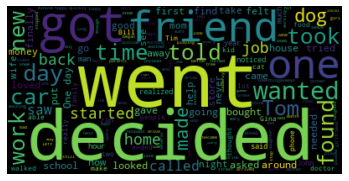

In [ ]:
common_words = ''
for i in df4.sentence:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(common_words)   
plt.imshow(wordcloud, interpolation = 'bilinear')  # bilinear is used to display smooth images
plt.axis('off')
plt.show()

In [ ]:
k = pd.Series(np.concatenate([x.split() for x in df4.sentence])).value_counts()
a = df4['sentence'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
print(len(word_dist))
rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 4987 samples and 44334 outcomes>
4987
       Word  Frequency
0         .       4207
1       the       1837
2        to       1654
3         a       1260
4        he       1110
5       was        964
6       she        916
7       and        866
8       her        665
9       his        617
10        ,        615
11        i        560
12       it        508
13       in        444
14       of        412
15      for        411
16      had        371
17       on        334
18     they        265
19       at        249
20       up        241
21     that        231
22       my        230
23     with        227
24      out        217
25  decided        209
26      him        207
27      n't        203
28       's        200
29      but        199


In [ ]:
print(df4.sentence.map(lambda x: len(x)).max())

72


In [ ]:
lengths = df4["sentence"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df4.iloc[argmax].head(1)

,motiveworkerid,sentence,maslow,reiss,maslowLabel
2639,ann0,Everyone in Victor's life gave him a really ha...,none,[none],0


##### Model BERT

https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

In [ ]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(2, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalCrossentropy(name='categorical_cross_entropy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df4['sentence'],df4['maslowLabel'],test_size = 0.2, random_state = 0, stratify = df4['maslowLabel'])

In [ ]:
x_train_text = x_train 
x_test_text = x_test
y_train_text = y_train
y_test_text = y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3478,)
(870,)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(3478,)
(870,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
history = model.fit(x_train, y_train,epochs=10,verbose=1,validation_data = (x_test,y_test))   

Epoch 1/10
109/109 [==============================] - 66s 470ms/step - loss: 0.7299 - accuracy: 0.5224 - val_loss: 0.6797 - val_accuracy: 0.5552
Epoch 2/10
109/109 [==============================] - 47s 435ms/step - loss: 0.6975 - accuracy: 0.5474 - val_loss: 0.6914 - val_accuracy: 0.5448
Epoch 3/10
109/109 [==============================] - 48s 443ms/step - loss: 0.6893 - accuracy: 0.5719 - val_loss: 0.6924 - val_accuracy: 0.5253
Epoch 4/10
109/109 [==============================] - 46s 426ms/step - loss: 0.6961 - accuracy: 0.5604 - val_loss: 0.6552 - val_accuracy: 0.6356
Epoch 5/10
109/109 [==============================] - 48s 439ms/step - loss: 0.6756 - accuracy: 0.5785 - val_loss: 0.6535 - val_accuracy: 0.6402
Epoch 6/10
109/109 [==============================] - 47s 429ms/step - loss: 0.6836 - accuracy: 0.5768 - val_loss: 0.6560 - val_accuracy: 0.6149
Epoch 7/10
109/109 [==============================] - 47s 431ms/step - loss: 0.6784 - accuracy: 0.5742 - val_loss: 0.6803 - val_ac

In [ ]:
model.evaluate(x_test, y_test)

28/28 [==============================] - 9s 334ms/step - loss: 0.6573 - accuracy: 0.5920


[0.6572766304016113, 0.5919540524482727]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


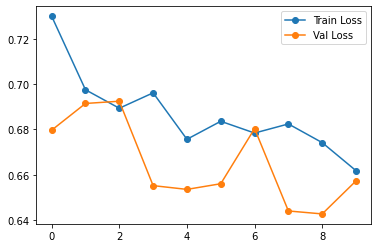

In [ ]:
plt.plot(history.history['loss'], '-o', label='Train Loss')
plt.plot(history.history['val_loss'], '-o', label = 'Val Loss')
plt.legend()

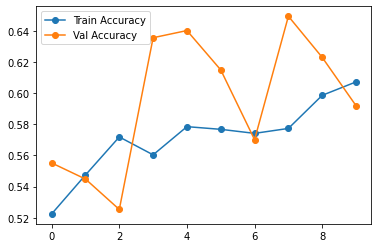

In [ ]:
plt.plot(history.history['accuracy'], '-o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'Val Accuracy')
plt.legend()

##### Evaluation and Analysis

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[2]

array([0.47654483, 0.5234552 ], dtype=float32)

In [ ]:
review_predictions = []
for prediction in y_pred:
    x = prediction
    review_predictions.append(np.argmax(x))

review_predictions = np.array(review_predictions)
review_predictions.reshape(1,-1)
review_predictions.shape

(870,)

In [ ]:
review_predictions

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,

In [ ]:
k = pd.DataFrame(review_predictions, columns = ['Label'])
k.groupby('Label')['Label'].count()

Label
0    166
1    704
Name: Label, dtype: int64

In [ ]:
type(y_test_text)

pandas.core.series.Series

In [ ]:
r1 = sklearn.metrics.confusion_matrix(review_predictions, y_test_text)
print(r1)

[[123  43]
 [312 392]]


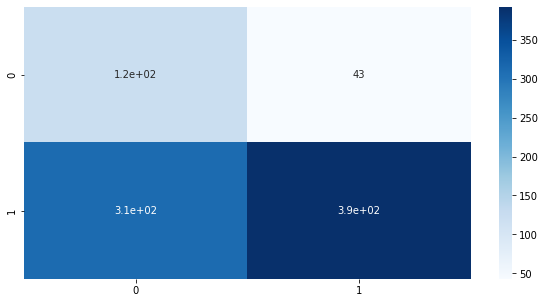

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.heatmap(r1, annot=True, cmap = 'Blues')

In [ ]:
lb.classes_

array(['none', 'stability'], dtype=object)

In [ ]:
y_test_text

1742    0
2172    1
2167    1
3884    0
3726    1
       ..
1892    1
1766    0
4004    1
141     0
3771    0
Name: maslowLabel, Length: 870, dtype: int64

In [ ]:
text_label = pd.Series(lb.inverse_transform(y_test_text))
integer_label = pd.Series(y_test_text)

In [ ]:
integer_label = integer_label.reset_index(drop = True)
integer_label[0:20]

0     0
1     1
2     1
3     0
4     1
5     0
6     0
7     1
8     1
9     1
10    1
11    0
12    0
13    1
14    1
15    1
16    1
17    1
18    0
19    0
Name: maslowLabel, dtype: int64

In [ ]:
text_label[0:20]

0          none
1     stability
2     stability
3          none
4     stability
5          none
6          none
7     stability
8     stability
9     stability
10    stability
11         none
12         none
13    stability
14    stability
15    stability
16    stability
17    stability
18         none
19         none
dtype: object

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'stability']


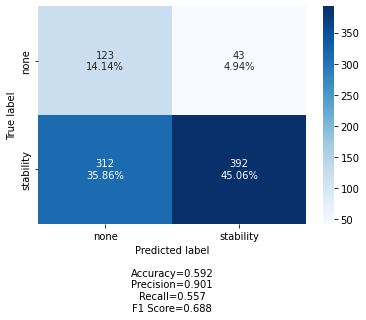

In [ ]:
make_confusion_matrix(r1, group_names=uniqueClassesMaslowLabel, categories=uniqueClassesMaslow, cmap='Blues')

In [ ]:
x_test_text = x_test_text.reset_index(drop = True)
x_test_text[0:5]

0    frank told Randy he was shy as well and wanted...
1    When she was moving towards one, another car c...
2                        Cullen was expecting to lose.
3    They took it to their history teacher to find ...
4    It wasn't until she decided to do so anyway th...
Name: sentence, dtype: object

In [ ]:
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

[0, 1]
['none', 'stability']


In [ ]:
y_test

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
count = 0
for i in range(0,len(review_predictions)):
    if review_predictions[i] != 0 and integer_label[i] == 0 and count != 10:
        print(x_test_text[i])
        count = count + 1

They took it to their history teacher to find out.
Bob bought an oil change business on a busy highway.
Her parents said that she needed to pass her English test first.
Kim was grocery shopping.
Bert Johnson was miles away from home when it started snowing.
They agreed to a truce and began to train together for the race.
He bought the ticket through a proxy.
The new bus had fresh ice cold water, the family drank some quickly.
Therefore, he received a lower haircut.
When they arrived at the restaurant it was really busy.


#### All Classes Reiss

##### Cleaning the Data

In [ ]:
df1 = df.drop(columns = ['action','motivation'])

In [ ]:
def clean(string):
    res = string.strip('][').split(', ')
    lis = []
    for word in res:
        q = word.strip('][').split(', ')
        w = q[0].lstrip('\"')[:-1]
        if w == '' or w == 'na':
            lis.append('none')
        else:
            lis.append(w)
    string = lis
    for classes in lis:
        if classes not in uniqueClasses:
            uniqueClasses.append(classes)
    return string

In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['maslow'][i] = clean(df1['maslow'][i]);
uniqueClassesMaslow = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['reiss'][i] = clean(df1['reiss'][i]);
uniqueClassesReiss = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df2 = df1
df3 = df2.explode('reiss')

In [ ]:
df3 = df3[df3['motiveworkerid'] != 'none']
df3 = df3[['motiveworkerid','sentence','maslow','reiss']]
df3 = df3.drop_duplicates(subset = ['sentence']).reset_index(drop = True)

In [ ]:
df3.head()

,motiveworkerid,sentence,maslow,reiss
0,ann0,I began making fish curry for my boyfriend and I.,[physiological],food
1,ann0,I decided not to read a recipe since I've made...,[spiritual growth],indep
2,ann0,I let the curry sit before tasting.,"[esteem, love]",competition
3,ann0,"When it was time to taste, I was disgusted.",[spiritual growth],none
4,ann0,I accidentally used a whole garlic instead of ...,[none],none


In [ ]:
'''
from sklearn.utils import shuffle
k1 = df3[df3['maslow'] == 'none'] 
k2 = df3[df3['maslow'] == 'physiological']
df3 = pd.concat([k1,k2],axis = 0)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
'''

"\nfrom sklearn.utils import shuffle\nk1 = df3[df3['maslow'] == 'none'] \nk2 = df3[df3['maslow'] == 'physiological']\ndf3 = pd.concat([k1,k2],axis = 0)\ndf3 = shuffle(df3)\ndf3 = df3.reset_index()\ndf3 = df3.drop(columns = 'index')\n"

##### Cleaning the Data for NLP tasks

In [ ]:
df3.shape

(10670, 4)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

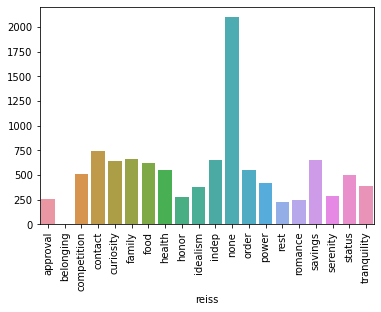

In [ ]:
c = df3.groupby('reiss')['reiss'].count()
sns.barplot(x = c.index, y = c.values)
plt.xticks(rotation = 90)

In [ ]:
df3 = df3[df3['reiss']!='belonging']
df3[['sentence','reiss']].groupby('reiss').count()

,sentence
reiss,
approval,255
competition,510
contact,744
curiosity,639
family,661
food,627
health,548
honor,279
idealism,380


In [ ]:
undersampling_count = df3[['sentence','reiss']].groupby('reiss').count().min()[0]
print(undersampling_count)
lis = list(df3['reiss'].unique())
print(lis)

229
['food', 'indep', 'competition', 'none', 'romance', 'contact', 'serenity', 'rest', 'status', 'approval', 'curiosity', 'savings', 'tranquility', 'health', 'idealism', 'power', 'order', 'honor', 'family']


In [ ]:
lis[16]

'order'

In [ ]:
# UNDERSAMPLING

dontSeeIndex = 16
from sklearn.utils import shuffle
lis = list(df3['reiss'].unique())
print(type(lis))
print(lis)
dataframes = []
for i in range(len(lis)):
    dataframe = 't' + str(i)
    dataframe = df3[df3['reiss'] == lis[i]]
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(columns = 'index')
    if i!=dontSeeIndex:
        dataframe = shuffle(dataframe)
        dataframe = dataframe.iloc[:229][:]
    dataframes.append(dataframe)
dataframes[0].head(1)
dataframes[5].head(1)

<class 'list'>
['food', 'indep', 'competition', 'none', 'romance', 'contact', 'serenity', 'rest', 'status', 'approval', 'curiosity', 'savings', 'tranquility', 'health', 'idealism', 'power', 'order', 'honor', 'family']


,motiveworkerid,sentence,maslow,reiss
675,ann0,Sonya blocked it and no one ever messed with h...,[love],contact


In [ ]:
df3 = pd.concat(dataframes)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
df3[['sentence','reiss']].groupby('reiss').count()

,sentence
reiss,
approval,229
competition,229
contact,229
curiosity,229
family,229
food,229
health,229
honor,229
idealism,229


In [ ]:
lb = LabelEncoder() 
df3['reissLabel'] = lb.fit_transform(df3['reiss'])

In [ ]:
print(df3['reiss'].unique())
print(df3['reissLabel'].unique())

['contact' 'food' 'order' 'power' 'rest' 'competition' 'serenity'
 'savings' 'status' 'none' 'family' 'indep' 'idealism' 'romance'
 'approval' 'honor' 'health' 'tranquility' 'curiosity']
[ 2  5 11 12 13  1 16 15 17 10  4  9  8 14  0  7  6 18  3]


In [ ]:
uniqueClassesReiss = list(df3['reiss'].unique())
uniqueClassesReissLabel = list(df3['reissLabel'].unique())
print(uniqueClassesReissLabel)
print(uniqueClassesReiss)

[2, 5, 11, 12, 13, 1, 16, 15, 17, 10, 4, 9, 8, 14, 0, 7, 6, 18, 3]
['contact', 'food', 'order', 'power', 'rest', 'competition', 'serenity', 'savings', 'status', 'none', 'family', 'indep', 'idealism', 'romance', 'approval', 'honor', 'health', 'tranquility', 'curiosity']


In [ ]:
df4 = df3.copy()

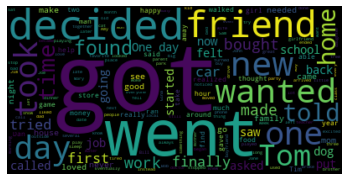

In [ ]:
common_words = ''
for i in df4.sentence:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(common_words)   
plt.imshow(wordcloud, interpolation = 'bilinear')  # bilinear is used to display smooth images
plt.axis('off')
plt.show()

In [ ]:
k = pd.Series(np.concatenate([x.split() for x in df4.sentence])).value_counts()
a = df4['sentence'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
print(len(word_dist))
rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
print(rslt)

<FreqDist with 5180 samples and 47430 outcomes>
5180
       Word  Frequency
0         .       4515
1       the       1958
2        to       1801
3         a       1310
4        he       1164
5       was       1102
6       she        994
7       and        929
8       her        750
9         ,        693
10      his        651
11        i        603
12       it        526
13       in        468
14      for        431
15       of        420
16      had        404
17       on        371
18     they        300
19       at        263
20       up        250
21      out        242
22     with        242
23     that        231
24       my        228
25      him        224
26      n't        211
27  decided        209
28     when        208
29     went        206


In [ ]:
print(df4.sentence.map(lambda x: len(x)).max())

72


In [ ]:
lengths = df4["sentence"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df4.iloc[argmax].head(1)

,motiveworkerid,sentence,maslow,reiss,reissLabel
4398,ann0,"Just then, Bethany walked in and told him it w...",[esteem],status,17


##### Model BERT

https://www.section.io/engineering-education/classification-model-using-bert-and-tensorflow/

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 4.9 MB 4.7 MB/s 
     |████████████████████████████████| 1.8 MB 4.6 MB/s 
     |████████████████████████████████| 352 kB 74.4 MB/s 
     |████████████████████████████████| 596 kB 63.4 MB/s 
     |████████████████████████████████| 238 kB 73.7 MB/s 
     |████████████████████████████████| 99 kB 10.5 MB/s 
     |████████████████████████████████| 1.1 MB 50.5 MB/s 
     |████████████████████████████████| 1.2 MB 54.1 MB/s 
     |████████████████████████████████| 116 kB 73.0 MB/s 
     |████████████████████████████████| 48.3 MB 66.1 MB/s 
     |████████████████████████████████| 43 kB 2.4 MB/s 


In [ ]:
import os
import shutil
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer
import matplotlib.pyplot as plt
tf.get_logger().setLevel('ERROR')

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['pooled_output'])
l = tf.keras.layers.Dense(19, activation='softmax', name="output")(l)

In [ ]:
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [ ]:
import keras
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.CategoricalCrossentropy(name='categorical_cross_entropy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df4['sentence'],df4['reissLabel'],test_size = 0.2, random_state = 0, stratify = df4['reissLabel'])

In [ ]:
x_train_text = x_train 
x_test_text = x_test
y_train_text = y_train
y_test_text = y_test

In [ ]:
print(x_train.shape)
print(x_test.shape)

(3738,)
(935,)


In [ ]:
print(x_train.shape)
print(x_test.shape)

(3738,)
(935,)


In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test =  to_categorical(y_test)

In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False
)

# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = model.fit(x_train, y_train,epochs=50, verbose=1, validation_data = (x_test,y_test),callbacks=[model_checkpoint_callback, callback])
#history = model.fit(x_train, y_train,epochs=10,verbose=1,validation_data = (x_test,y_test))   

Epoch 1/50
117/117 [==============================] - 51s 438ms/step - loss: 2.9676 - accuracy: 0.0987 - val_loss: 2.9234 - val_accuracy: 0.1219
Epoch 2/50
117/117 [==============================] - 47s 401ms/step - loss: 2.9467 - accuracy: 0.1030 - val_loss: 2.8897 - val_accuracy: 0.1176
Epoch 3/50
117/117 [==============================] - 47s 403ms/step - loss: 2.9059 - accuracy: 0.1180 - val_loss: 2.8907 - val_accuracy: 0.1219
Epoch 4/50
117/117 [==============================] - 49s 416ms/step - loss: 2.8792 - accuracy: 0.1174 - val_loss: 2.8560 - val_accuracy: 0.1230
Epoch 5/50
117/117 [==============================] - 49s 420ms/step - loss: 2.8492 - accuracy: 0.1335 - val_loss: 2.8883 - val_accuracy: 0.1273
Epoch 6/50
117/117 [==============================] - 49s 416ms/step - loss: 2.8394 - accuracy: 0.1263 - val_loss: 2.8258 - val_accuracy: 0.1455
Epoch 7/50
117/117 [==============================] - 47s 402ms/step - loss: 2.8240 - accuracy: 0.1396 - val_loss: 2.8326 - val_ac

In [ ]:
model.load_weights(checkpoint_filepath)
model.evaluate(x_test, y_test)

30/30 [==============================] - 10s 337ms/step - loss: 2.7070 - accuracy: 0.2000


[2.706963062286377, 0.20000000298023224]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


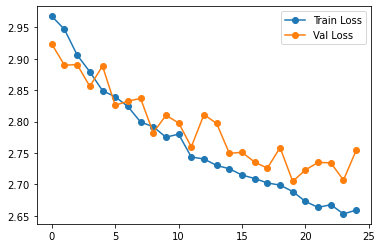

In [ ]:
plt.plot(history.history['loss'], '-o', label='Train Loss')
plt.plot(history.history['val_loss'], '-o', label = 'Val Loss')
plt.legend()

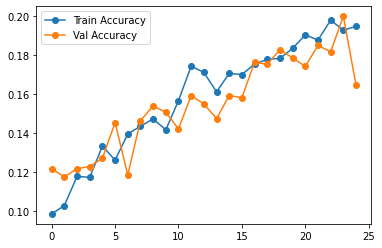

In [ ]:
plt.plot(history.history['accuracy'], '-o', label='Train Accuracy')
plt.plot(history.history['val_accuracy'], '-o', label = 'Val Accuracy')
plt.legend()

##### Evaluation and Analysis

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred[2]

array([0.03629725, 0.20766877, 0.02573187, 0.0547201 , 0.02611773,
       0.00873184, 0.05137726, 0.03466963, 0.02047459, 0.06439573,
       0.04016173, 0.09863585, 0.05895555, 0.02556933, 0.01694024,
       0.03897963, 0.08543685, 0.05447096, 0.05066517], dtype=float32)

In [ ]:
review_predictions = []
for prediction in y_pred:
    x = prediction
    review_predictions.append(np.argmax(x))

review_predictions = np.array(review_predictions)
review_predictions.reshape(1,-1)
review_predictions.shape

(935,)

In [ ]:
review_predictions

array([ 1, 11,  1,  0, 11,  1, 18, 13, 11, 11, 11, 16, 11, 11,  1,  9,  1,
        1,  5, 11,  0, 11,  5, 11, 11, 11, 11, 11,  4, 11,  1,  1,  5,  6,
        4, 14,  1,  1,  1,  5,  4, 11,  9, 11,  5,  5, 16, 11,  4,  6,  9,
       11,  1, 11,  5, 11,  1, 11, 11, 11, 11, 16,  9,  1, 16, 11, 11,  1,
        4,  9, 11,  4,  4, 11,  1, 11, 13,  1, 11, 15, 14, 11,  1, 11, 13,
       11, 11, 14, 11, 18,  1,  4, 11, 14, 16,  1,  6, 11, 11, 14, 14,  6,
       11, 14, 11, 11,  4,  4, 11, 18, 11, 11,  1,  6,  1, 11,  1, 11,  3,
       11, 11,  4,  9,  1,  1, 13, 13,  5, 11, 11,  6, 18,  6, 18, 11,  6,
       14,  6, 11, 11, 11, 11,  4, 11, 11,  5, 18, 14, 16, 16,  6,  6, 11,
        6, 11,  1, 11,  1, 11, 11,  6,  4,  1, 14, 11,  0,  1,  9,  6,  4,
       11, 11,  1, 16,  1,  4, 18, 16, 14,  1,  4, 11, 13,  9, 11,  4, 11,
        1, 11, 11,  6, 18, 11, 16,  1, 11, 11,  1, 11,  2,  1, 14, 18,  9,
       11,  4,  9, 14, 11, 11,  1,  4, 11,  4, 13, 11, 11,  6,  4, 11, 11,
        4, 11, 11, 11, 15

In [ ]:
k = pd.DataFrame(review_predictions, columns = ['Label'])
k.groupby('Label')['Label'].count()

Label
0       7
1     143
2       4
3       5
4      69
5      46
6      46
7       1
9      44
11    400
13     15
14     58
15      7
16     39
18     51
Name: Label, dtype: int64

In [ ]:
type(y_test_text)

pandas.core.series.Series

In [ ]:
r1 = sklearn.metrics.confusion_matrix(review_predictions, y_test_text)
print(r1)

[[ 0  0  1  1  1  0  0  1  1  0  0  0  1  0  0  0  0  1  0]
 [ 9 24  3  7  2  2  3 13  6 12  5  8 17  0  5  8  6  8  5]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  0  0  0  1  1  0]
 [ 1  0  0  0  1  0  0  0  1  0  0  0  0  0  1  0  0  1  0]
 [ 4  1 11  0 15  2  2  2  4  3  4  3  2  3  3  3  1  4  2]
 [ 0  1  2  1  5 15  5  1  1  0  0  3  1  4  0  2  1  0  4]
 [ 0  3  1  3  1  0  7  3  2  1  2  7  1  5  2  4  1  2  1]
 [ 0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  1  3  4  0  1  1  1  1  7  1  4  5  0  0  3  4  4  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [23 11 16 24 11 19 20 18 19 18 24 70 15 25  8 21 14 19 25]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  1  0  0  0  0  2  0  0  4  0  0  4  1  0]
 [ 1  1  6  0  5  1  1  1  4  1  0  3  1  0 27  1  3  2  0]
 [ 0  0  0  0  0  0  0  0  3  0  0  2  0  0  0  2  0  0  0]
 [ 2  0  1  4  2  3  2  2  2  2  2  2  1

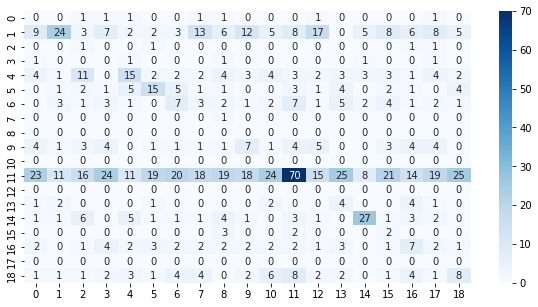

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(5)
sns.heatmap(r1, annot=True, cmap = 'Blues')

In [ ]:
lb.classes_

array(['approval', 'competition', 'contact', 'curiosity', 'family',
       'food', 'health', 'honor', 'idealism', 'indep', 'none', 'order',
       'power', 'rest', 'romance', 'savings', 'serenity', 'status',
       'tranquility'], dtype=object)

In [ ]:
y_test_text

3572    18
4191     3
2074     7
3334    17
968     15
        ..
3417    12
4662    13
4372     4
3625    17
1767    11
Name: reissLabel, Length: 935, dtype: int64

In [ ]:
text_label = pd.Series(lb.inverse_transform(y_test_text))
integer_label = pd.Series(y_test_text)

In [ ]:
integer_label = integer_label.reset_index(drop = True)
integer_label[0:20]

0     18
1      3
2      7
3     17
4     15
5      1
6     13
7     16
8     17
9     11
10    15
11     5
12    11
13    18
14     3
15    17
16     3
17     0
18     5
19     0
Name: reissLabel, dtype: int64

In [ ]:
text_label[0:20]

0     tranquility
1       curiosity
2           honor
3          status
4         savings
5     competition
6            rest
7        serenity
8          status
9           order
10        savings
11           food
12          order
13    tranquility
14      curiosity
15         status
16      curiosity
17       approval
18           food
19       approval
dtype: object

In [ ]:
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=(15,25))
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
print(uniqueClassesReissLabel)
print(uniqueClassesReiss)

[2, 5, 11, 12, 13, 1, 16, 15, 17, 10, 4, 9, 8, 14, 0, 7, 6, 18, 3]
['contact', 'food', 'order', 'power', 'rest', 'competition', 'serenity', 'savings', 'status', 'none', 'family', 'indep', 'idealism', 'romance', 'approval', 'honor', 'health', 'tranquility', 'curiosity']


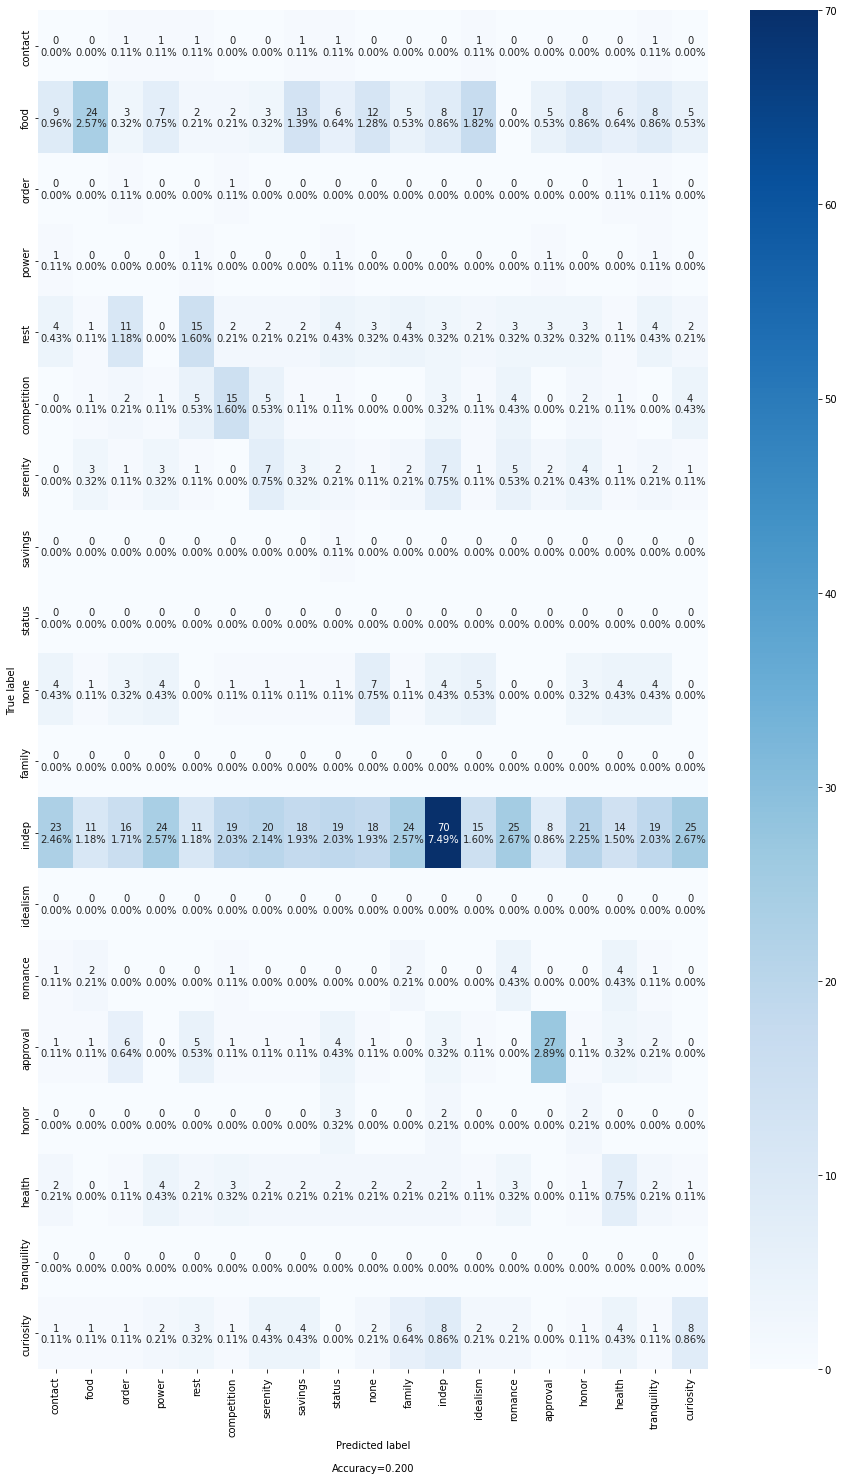

In [ ]:
make_confusion_matrix(r1, group_names=uniqueClassesReissLabel, categories=uniqueClassesReiss, cmap='Blues')

In [ ]:
x_test_text = x_test_text.reset_index(drop = True)
x_test_text[0:5]

0                 Jacqueline is afraid of earthquakes.
1                          Liam needed a new computer.
2    Greg was humbled as he realized that winning w...
3    I shopped around for bands and found out that ...
4          He thought he didn't have anything to lose.
Name: sentence, dtype: object

In [ ]:
print(uniqueClassesReissLabel)
print(uniqueClassesReiss)

[2, 5, 11, 12, 13, 1, 16, 15, 17, 10, 4, 9, 8, 14, 0, 7, 6, 18, 3]
['contact', 'food', 'order', 'power', 'rest', 'competition', 'serenity', 'savings', 'status', 'none', 'family', 'indep', 'idealism', 'romance', 'approval', 'honor', 'health', 'tranquility', 'curiosity']


In [ ]:
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
count = 0
for i in range(0,len(review_predictions)):
    if review_predictions[i] != 0 and integer_label[i] == 0 and count != 10:
        print(x_test_text[i])
        count = count + 1

He auditioned for a TV show.
She made it where no one could tag her in photos anymore.
Gabriel realized he was being a baby and decided to get bad grades.
So he bought shoes with typical laces.
Once they began spray painting, Jerome took off and ran.
Tommy was excited about getting a new puppy.
Kate always recycles.
Fred was glad to see the snow had stopped.
When she got it though she regretted it.
All of a sudden, his guitar string broke.


#### BERT 2

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
import sklearn

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords  
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter 
import wordcloud
from nltk.corpus import stopwords 
from textblob import Word 
import re
from string import punctuation
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('t.csv')

##### Cleaning the Data

In [ ]:
df1 = df.drop(columns = ['action','motivation'])

In [ ]:
def clean(string):
    res = string.strip('][').split(', ')
    lis = []
    for word in res:
        q = word.strip('][').split(', ')
        w = q[0].lstrip('\"')[:-1]
        if w == '' or w == 'na':
            lis.append('none')
        else:
            lis.append(w)
    string = lis
    for classes in lis:
        if classes not in uniqueClasses:
            uniqueClasses.append(classes)
    return string

In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['maslow'][i] = clean(df1['maslow'][i]);
uniqueClassesMaslow = uniqueClasses

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
uniqueClasses = []
for i in range(0,df1.shape[0]):
    df1['reiss'][i] = clean(df1['reiss'][i]);
uniqueClassesReiss = uniqueClasses

In [ ]:
df2 = df1
df3 = df2.explode('reiss')

In [ ]:
df3 = df3[df3['motiveworkerid'] != 'none']
df3 = df3[['motiveworkerid','sentence','maslow','reiss']]
df3 = df3.drop_duplicates(subset = ['sentence']).reset_index(drop = True)

In [ ]:
df3.head()

In [ ]:
'''
from sklearn.utils import shuffle
k1 = df3[df3['maslow'] == 'none'] 
k2 = df3[df3['maslow'] == 'physiological']
df3 = pd.concat([k1,k2],axis = 0)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
'''

##### Cleaning the Data for NLP tasks

In [ ]:
df3.shape

In [ ]:
c = df3.groupby('maslow')['maslow'].count()
sns.barplot(x = c.index, y = c.values)
plt.xticks(rotation = 90)

In [ ]:
df3[['sentence','maslow']].groupby('maslow').count()

In [ ]:
undersampling_count = df3[['sentence','maslow']].groupby('maslow').count().min()[0]
print(undersampling_count)
print(list(df3['maslow'].unique()))

In [ ]:
# UNDERSAMPLING

dontSeeIndex = 0
from sklearn.utils import shuffle
lis = list(df3['reiss'].unique())
print(type(lis))
print(lis)
dataframes = []
for i in range(len(lis)):
    dataframe = 't' + str(i)
    dataframe = df3[df3['maslow'] == lis[i]]
    dataframe = dataframe.reset_index()
    dataframe = dataframe.drop(columns = 'index')
    if i!=dontSeeIndex:
        dataframe = shuffle(dataframe)
        dataframe = dataframe.iloc[:1139][:]
    dataframes.append(dataframe)
dataframes[0].head(1)
dataframes[5].head(1)

In [ ]:
df3 = pd.concat(dataframes)
df3 = shuffle(df3)
df3 = df3.reset_index()
df3 = df3.drop(columns = 'index')
df3[['sentence','maslow']].groupby('maslow').count()

In [ ]:
lb = LabelEncoder() 
df3['maslowLabel'] = lb.fit_transform(df3['maslow'])

In [ ]:
print(df3['maslow'].unique())
print(df3['maslowLabel'].unique())

In [ ]:
uniqueClassesMaslow = list(df3['maslow'].unique())
uniqueClassesMaslowLabel = list(df3['maslowLabel'].unique())
print(uniqueClassesMaslowLabel)
print(uniqueClassesMaslow)

In [ ]:
df4 = df3.copy()

In [ ]:
common_words = ''
for i in df4.sentence:
    i = str(i)
    tokens = i.split()
    common_words += " ".join(tokens) + " "
wordcloud = WordCloud().generate(common_words)   
plt.imshow(wordcloud, interpolation = 'bilinear')  # bilinear is used to display smooth images
plt.axis('off')
plt.show()

In [ ]:
k = pd.Series(np.concatenate([x.split() for x in df4.sentence])).value_counts()
a = df4['sentence'].str.lower().str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
print (word_dist)
print(len(word_dist))
rslt = pd.DataFrame(word_dist.most_common(30),
                    columns=['Word', 'Frequency'])
print(rslt)

In [ ]:
print(df4.sentence.map(lambda x: len(x)).max())

In [ ]:
lengths = df4["sentence"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df4.iloc[argmax].head(1)

##### Model Bert

https://colab.research.google.com/drive/1Zx58T7hGvOtvfhSfIcus_92ddeqrloB8#scrollTo=E2BPgRJ7YBK0

In [ ]:
df4.head(3)

In [ ]:
df4 = df4[['sentence','reiss','reissLabel']]

In [ ]:
!pip install transformers

In [ ]:
from torch.utils.data import Dataset, DataLoader
import random
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from collections import defaultdict
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
token_lens = []
for txt in df4.sentence:
  tokens = tokenizer.encode(txt, max_length=512,truncation=True)
  token_lens.append(len(tokens))

In [ ]:
sns.distplot(token_lens)
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 25

In [ ]:
class Classification(Dataset):

  def __init__(self, sentences, targets, tokenizer, max_len):
    self.sentences = sentences
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.sentences)
  
  def __getitem__(self, item):
    sentence = str(self.sentences[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      sentence,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
      truncation=True
    )

    return {
      'sentence_text': sentence,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [ ]:
df_train, df_test = train_test_split(df4, test_size=0.2, random_state=RANDOM_SEED)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=RANDOM_SEED)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

In [ ]:
def seed_worker(worker_id):
    worker_seed = RANDOM_SEED
    np.random.seed(worker_seed)
    random.seed(worker_seed)

g = torch.Generator()
g.manual_seed(RANDOM_SEED)
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = Classification(
    sentences=df.sentence.to_numpy(),
    targets=df['maslowLabel'].to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    worker_init_fn=seed_worker,
    generator=g,
    num_workers=1
    
  )

In [ ]:
df4.head()

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME,return_dict=False)

In [ ]:
#last_hidden_state.shape

In [ ]:
bert_model.config.hidden_size

In [ ]:
#pooled_output.shape

In [ ]:
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
class_names = list(df4['maslow'].unique())

In [ ]:
model = SentimentClassifier(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

In [ ]:
EPOCHS = 10

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.pth')
    best_accuracy = val_acc

In [ ]:
#plt.plot(history['train_acc'], label='train accuracy')
#plt.plot(history['val_acc'], label='validation accuracy')

#plt.title('Training history')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend()
#plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  review_texts = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["sentence_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      review_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return review_texts, predictions, prediction_probs, real_values

In [ ]:
y_review_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True category')
  plt.xlabel('Predicted category');

cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
idx = 2
review_text = y_review_texts[idx]
true_sentiment = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('sentiment')
plt.xlabel('probability')
plt.xlim([0, 1]);

##### Model Roberta

https://colab.research.google.com/github/DhavalTaunk08/NLP_scripts/blob/master/sentiment_analysis_using_roberta.ipynb#scrollTo=mhqvtY2SIup7

In [ ]:
df4.head(3)

In [ ]:
df4 = df4[['sentence','maslow','maslowLabel']]

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import seaborn as sns
import transformers
import json
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaModel, RobertaTokenizer
import logging
logging.basicConfig(level=logging.ERROR)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
from sklearn.metrics import confusion_matrix, classification_report
import torch

In [ ]:
# Defining some key variables that will be used later on in the training
MAX_LEN = 256
TRAIN_BATCH_SIZE = 8
VALID_BATCH_SIZE = 4
# EPOCHS = 1
LEARNING_RATE = 1e-05
tokenizer = RobertaTokenizer.from_pretrained('roberta-base', truncation=True, do_lower_case=True)

In [ ]:
df4.head()

In [ ]:
new_df = df4.copy()

In [ ]:
class SentimentData(Dataset):
    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.text = dataframe.sentence
        self.targets = self.data.maslowLabel
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
train_size = 0.8
train_data=new_df.sample(frac=train_size,random_state=200)
test_data=new_df.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)
print("FULL Dataset: {}".format(new_df.shape))
print("TRAIN Dataset: {}".format(train_data.shape))
print("TEST Dataset: {}".format(test_data.shape))

training_set = SentimentData(train_data, tokenizer, MAX_LEN)
testing_set = SentimentData(test_data, tokenizer, MAX_LEN)

In [ ]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

In [ ]:
class RobertaClass(torch.nn.Module):
    def __init__(self):
        super(RobertaClass, self).__init__()
        self.l1 = RobertaModel.from_pretrained("roberta-base")
        self.pre_classifier = torch.nn.Linear(768, 768)
        self.dropout = torch.nn.Dropout(0.3)
        self.classifier = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
        pooler = self.pre_classifier(pooler)
        pooler = torch.nn.ReLU()(pooler)
        pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        return output

In [ ]:
model = RobertaClass()
model.to(device)

In [ ]:
# Creating the loss function and optimizer
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [ ]:
def calcuate_accuracy(preds, targets):
    n_correct = (preds==targets).sum().item()
    return n_correct

In [ ]:
# Defining the training function on the 80% of the dataset for tuning the distilbert model

def train(epoch):
    tr_loss = 0
    n_correct = 0
    nb_tr_steps = 0
    nb_tr_examples = 0
    model.train()
    for _,data in tqdm(enumerate(training_loader, 0)):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)
        loss = loss_function(outputs, targets)
        tr_loss += loss.item()
        big_val, big_idx = torch.max(outputs.data, dim=1)
        n_correct += calcuate_accuracy(big_idx, targets)

        nb_tr_steps += 1
        nb_tr_examples+=targets.size(0)
        
        if _%5000==0:
            loss_step = tr_loss/nb_tr_steps
            accu_step = (n_correct*100)/nb_tr_examples 
            print(f"Training Loss per 5000 steps: {loss_step}")
            print(f"Training Accuracy per 5000 steps: {accu_step}")

        optimizer.zero_grad()
        loss.backward()
        # # When using GPU
        optimizer.step()

    print(f'The Total Accuracy for Epoch {epoch}: {(n_correct*100)/nb_tr_examples}')
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Training Loss Epoch: {epoch_loss}")
    print(f"Training Accuracy Epoch: {epoch_accu}")

    return 

In [ ]:
EPOCHS = 5
for epoch in range(EPOCHS):
    train(epoch)

In [ ]:
def valid(model, testing_loader):
    model.eval()
    n_correct = 0; n_wrong = 0; total = 0; tr_loss=0; nb_tr_steps=0; nb_tr_examples=0
    with torch.no_grad():
        for _, data in tqdm(enumerate(testing_loader, 0)):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids).squeeze()
            loss = loss_function(outputs, targets)
            tr_loss += loss.item()
            big_val, big_idx = torch.max(outputs.data, dim=1)
            n_correct += calcuate_accuracy(big_idx, targets)

            nb_tr_steps += 1
            nb_tr_examples+=targets.size(0)
            
            if _%5000==0:
                loss_step = tr_loss/nb_tr_steps
                accu_step = (n_correct*100)/nb_tr_examples
                print(f"Validation Loss per 100 steps: {loss_step}")
                print(f"Validation Accuracy per 100 steps: {accu_step}")
    epoch_loss = tr_loss/nb_tr_steps
    epoch_accu = (n_correct*100)/nb_tr_examples
    print(f"Validation Loss Epoch: {epoch_loss}")
    print(f"Validation Accuracy Epoch: {epoch_accu}")
    
    return epoch_accu

In [ ]:
acc = valid(model, testing_loader)
print("Accuracy on test data = %0.2f%%" % acc)